Data source : https://www.kaggle.com/datasets/shubhankitsirvaiya06/diamond-price-prediction

# Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read Data

In [3]:
df = pd.read_csv("../data/raw/extracted/diamonds.csv")

# First 5 rows of dataset

In [4]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# Info of dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


There are 9 independent variables:

* `carat` : Carat (ct.) refers to the unique unit of weight measurement used exclusively to weigh gemstones and diamonds.
* `cut` : Quality of Diamond Cut
* `color` : Color of Diamond
* `clarity` : Diamond clarity is a measure of the purity and rarity of the stone, graded by the visibility of these characteristics under 10-power magnification.
* `depth` : The depth of diamond is its height (in millimeters) measured from the culet (bottom tip) to the table (flat, top surface)
* `table` : A diamond's table is the facet which can be seen when the stone is viewed face up.
* `x` : Diamond X dimension
* `y` : Diamond Y dimension
* `x` : Diamond Z dimension

Target variable:
* `price`: Price of the given Diamond.

# Unique categories of 'cut'

In [6]:
df['cut'].value_counts()

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

# Unique categories of 'color'

In [7]:
df['color'].value_counts()

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

# Unique categories of 'clarity'

In [8]:
df['clarity'].value_counts()

clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64

# Check null values

In [9]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

# Value distribution of various features

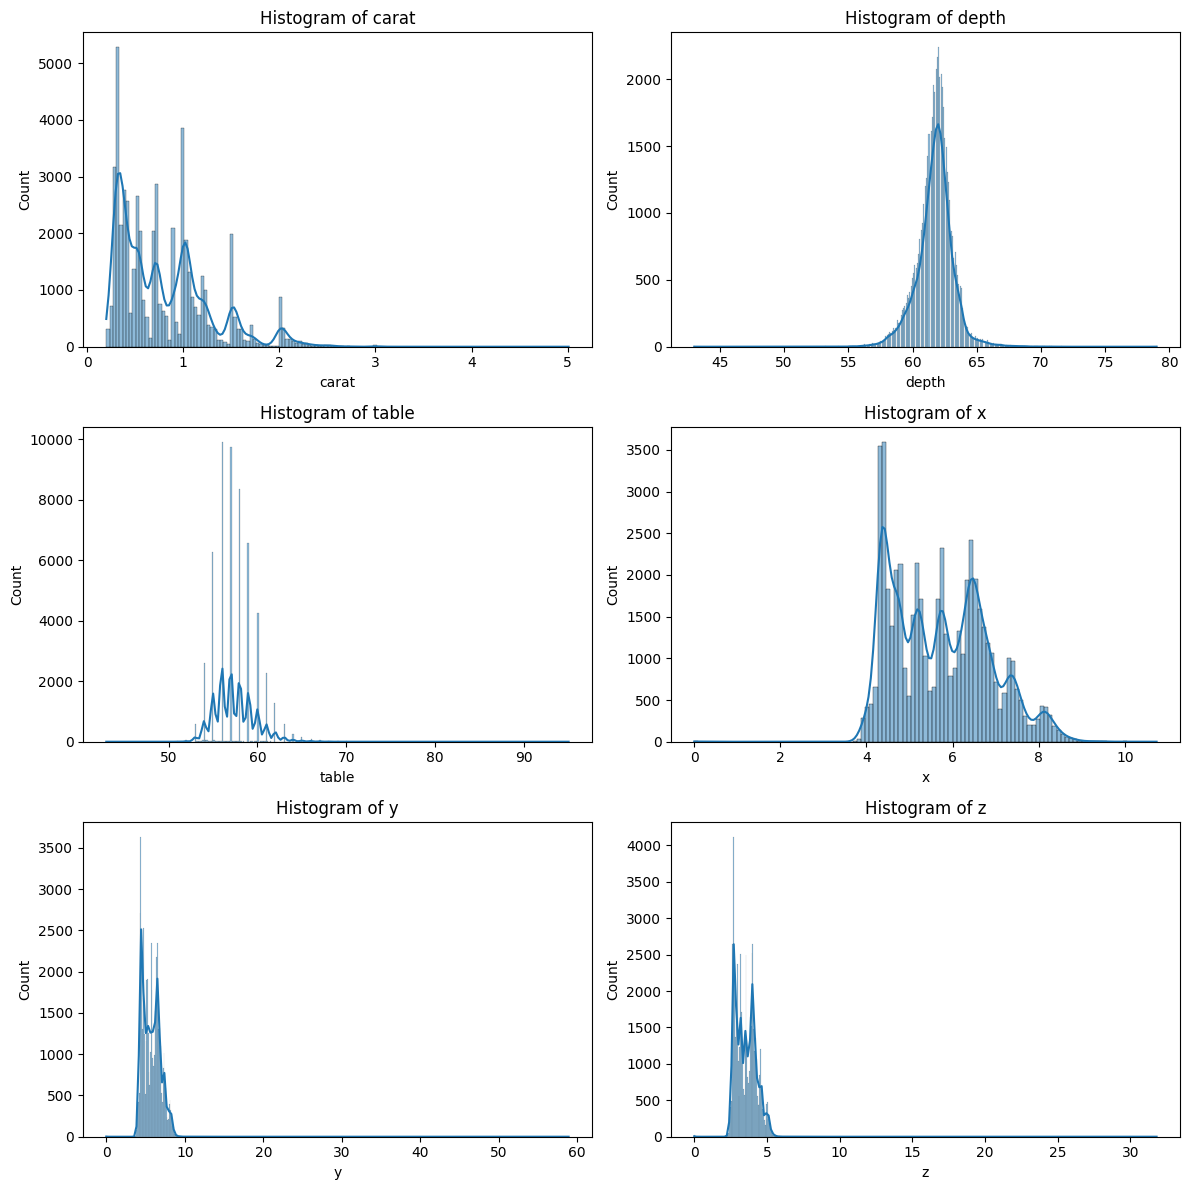

In [10]:
columns_to_plot = ['carat', 'depth', 'table','x','y','z']
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
axes = axes.flatten()
for i, col in enumerate(columns_to_plot):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

# Price distribution

Right skewed data

<Axes: xlabel='price', ylabel='Count'>

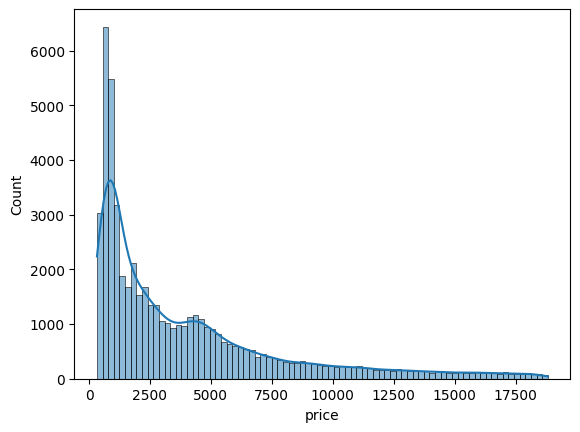

In [11]:
sns.histplot(df['price'],kde=True)

Text(0.5, 1.0, 'Cut vs Price')

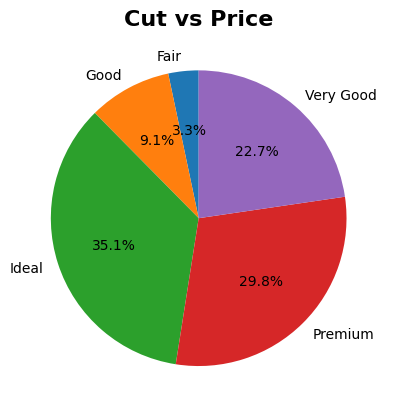

In [15]:
prices_by_cut = df.groupby('cut')['price'].sum()
plt.pie(prices_by_cut,labels=prices_by_cut.index, autopct='%2.1f%%', startangle=90)
plt.title('Cut vs Price',fontsize=16, fontweight='bold')

Text(0.5, 1.0, 'Clarity vs Prices')

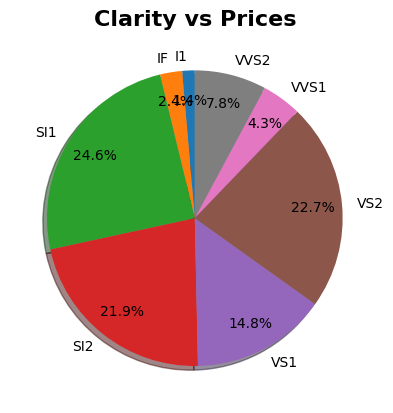

In [27]:
prices_by_clarity = df.groupby('clarity')['price'].sum()
plt.pie(prices_by_clarity, labels=prices_by_clarity.index, autopct='%2.1f%%',shadow=True, startangle=90,pctdistance=0.8)
plt.title('Clarity vs Prices', fontsize=16, fontweight='bold')

Text(0.5, 1.0, 'color vs Prices')

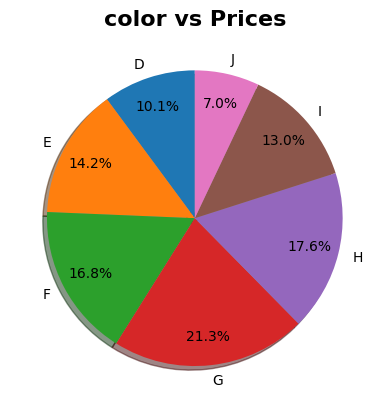

In [28]:
prices_by_clarity = df.groupby('color')['price'].sum()
plt.pie(prices_by_clarity, labels=prices_by_clarity.index, autopct='%2.1f%%',shadow=True, startangle=90,pctdistance=0.8)
plt.title('color vs Prices', fontsize=16, fontweight='bold')

<Axes: xlabel='clarity', ylabel='price'>

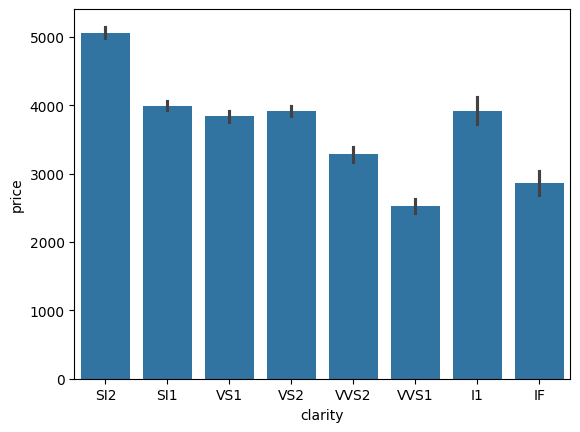

In [20]:
sns.barplot(df,x=df['clarity'],y=df['price'])